# Convolutional Neural Networks

## Theory topics

When initializing weights, instead of using all zeroes or a distribution around zero, use Xavier initialization:

Xavier initialization: draw weights from a distribution with:
 - mean: 0
 - variance: $Var(W) = \frac{1}{n_{in}}$

W -> initialization distribution for the neuron in question (Gaussian or Uniform)  
$n_{in}$ -> number of neurons feeding the neuron

### Gradient Descent components

Learning Rate - defines the step size during gradient descent  
Batch Size - batches allow us to use stochastic gradient descent:
 - Smaller: less representative of data
 - Larger: longer training time

Using batches we can compute parameters that otherwise we wouldn't

**Second order behavior** of gradient descent, adjusts the learning rate according to the rate of descent: 
 - AdaGrad 
 - RMSProp 
 - Adam

It is based on the assumption that error will be larger at the first training steps than in the last ones, and same should be the learning rate.

**Unstable / Vanishing Gradients**, while doing backpropagation in deep networks, layers at the input level will not be affected and thus gradients descent should apply less than those nearer to the output.

**Overfitting vs. Underfitting a model**

Large error on training, large error on testing -> underfitting
Small error on training, large error on testing -> overfitting

Avoiding overfitting: 

- L1/L2 Regularization: add penalty for large weights in the model
- Dropout: remove neurons during training, randomly
- Expanding data: add artificial noise to data

## MNIST Dataset

### Softmax approach

In [1]:
import tensorflow as tf
import numpy as np

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets(
    "davizuku_data/MNIST_data/", 
    one_hot = True
)

Extracting davizuku_data/MNIST_data/train-images-idx3-ubyte.gz
Extracting davizuku_data/MNIST_data/train-labels-idx1-ubyte.gz
Extracting davizuku_data/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting davizuku_data/MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [5]:
mnist.train.images

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [6]:
mnist.train.num_examples

55000

In [7]:
mnist.test.num_examples

10000

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
mnist.train.images.shape

(55000, 784)

In [10]:
single_image = mnist.train.images[17].reshape(28,28)

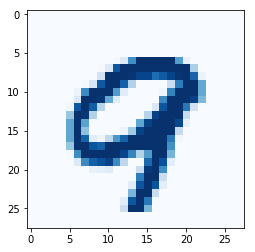

In [11]:
plt.imshow(single_image, cmap='Blues')

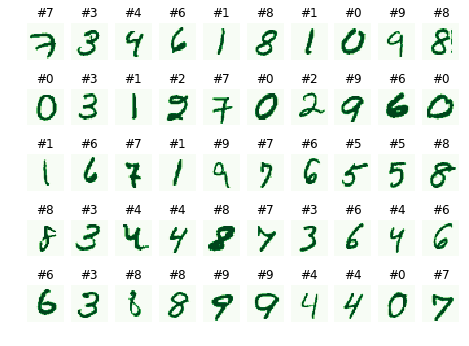

In [12]:
cols = 10
rows = 5
for i in range(cols):
    for j in range(rows):
        index = i * rows + j
        image = mnist.train.images[index].reshape(28,28)
        label = str(np.argmax(mnist.train.labels[index]))
        plt.subplot(rows, cols, index+1)
        plt.title('#' + label)
        plt.axis('off')
        plt.imshow(image, cmap='Greens')
        plt.subplots_adjust(left=0.0, right=1.0, top=1.1, bottom=0.0)

In [13]:
mnist.train.labels[1]

array([ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.])

In [14]:
single_image.min()

0.0

In [15]:
single_image.max()

1.0

In [16]:
mnist.train.images.shape

(55000, 784)

In [17]:
mnist.train.labels.shape

(55000, 10)

In [18]:
# y = W * x + b

In [19]:
# PLACEHOLDERS
x = tf.placeholder(tf.float32, shape=[None, 784])

In [20]:
# VARIABLES
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [21]:
# GRAPH OPERATIONS
y = tf.matmul(x, W) + b

In [22]:
# LOSS FUNCTION
y_true = tf.placeholder(tf.float32, shape=[None, 10])

In [23]:
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(
        labels = y_true, 
        logits = y
    )
)

In [24]:
# OPTIMIZER
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train = optimizer.minimize(cross_entropy)

In [25]:
# CREATE SESSION
init = tf.global_variables_initializer()

In [37]:
batch_size = 100
with tf.Session() as sess:
    sess.run(init)
    for step in range(1000):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        sess.run(train, feed_dict = {x: batch_x, y_true: batch_y})
    
    # Evaluate the model
    correct_prediction = tf.equal(
        tf.argmax(y, axis=1), 
        tf.argmax(y_true, axis=1)
    )
    
    # [True, False, True, ...] --> [1, 0, 1, ...]
    acc = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    evaluation_dict = {
        x: mnist.test.images,
        y_true: mnist.test.labels
    }
    s_acc, l_correct, y_predicted = sess.run([acc, correct_prediction, y], feed_dict = evaluation_dict)
    print("Model accuracy: " + str(s_acc))

Model accuracy: 0.9181


## Visualizing errors

In [38]:
l_incorrect = np.logical_not(l_correct)

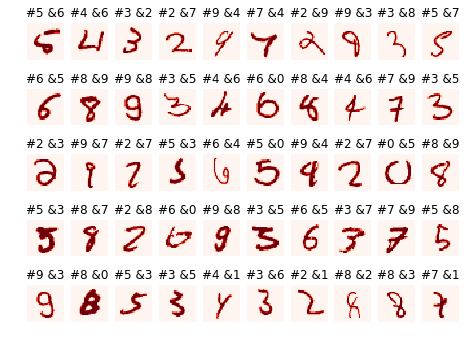

In [47]:
cols = 10
rows = 5
for i in range(cols):
    for j in range(rows):
        index = i * rows + j
        image = mnist.test.images[l_incorrect][index].reshape(28,28)
        label = str(np.argmax(mnist.test.labels[l_incorrect][index]))
        pred_lbl = str(np.argmax(y_predicted[l_incorrect][index]))
        plt.subplot(rows, cols, index+1)
        plt.title('#' + label + ' &' + pred_lbl)
        plt.axis('off')
        plt.imshow(image, cmap='Reds')
        plt.subplots_adjust(left=0.0, right=1.0, top=1.1, bottom=0.0)

# Convolutional Neural Networks (Theory)

## Tensors

N-Dimensional arrays

## DNN vs CNN

Densely Neural network <-- all to all
Convolutional Neural network <-- a neuron is only connected to a subset of the next layer

- Each CNN layer looks at an increasingly larger part of the image. 
- Units connected to nearby units also aids in invariance.
- CNN helps with regularization limiting the search of weights to the size of the convolution, i.e. Reduceds the number of parameters


## Convolutions and Filters

Filters: number of different "CNN layers"

Filter Size: number of neurons from one layer to the next neuron

Stride: move of the convolution

http://setosa.io/ev/image-kernels/


## Padding



## Pooling Layers

Subsampling === Pooling

 - Reduce memory usage
 - Less computation time
 - Less parameters
 

## Review Dropout

 - Regularization, prevent overfitting
 - Units are dropped during training
 
## Architectures

- LeNet-5
- AlexNet
- GoogLeNet
- ResNet
... 


# MNIST CNN

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_datat_data

In [3]:
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [7]:
# HELPER

# INIT WEIGHTS
def init_weights(shape):
    init_random_dist = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(init_random_dist)

In [8]:
# INIT BIAS
def init_bias(shape):
    init_bias_vals = tf.constant(0.1, shape=shape)
    return tf.Variable(init_bias_vals)

In [16]:
# CONV2D
def conv2d(x, W):
    # x --> [ batch, H, W, Channels ]
    # W --> [ filter H, filter W, Channels IN, Channels OUT ]
    return tf.nn.conv2d(x, W, strides=[1,1,1,1], padding='SAME')

In [17]:
# POOLING
def max_pool_2by2(x):
    # x --> [ batch, H, W, Channels ]
    return tf.nn.max_pool(
        x, 
        ksize=[1, 2, 2, 1], 
        strides=[1, 2, 2, 1], 
        padding='SAME'
    )

In [18]:
# Convolutional layer
def convolutional_layer(input_x, shape):
    W = init_weights(shape)
    b = init_bias([shape[3]])
    return tf.nn.relu(conv2d(input_x, W)+b)

In [19]:
# NORMAL (FULLY CONNECTED) layer
def normal_full_layer(input_layer, size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size, size])
    b = init_bias([size])
    return tf.matmul(input_layer, W) + b

In [20]:
# PLACEHOLDERS
x = tf.placeholder(tf.float32, shape=[None, 784])

In [21]:
y_true = tf.placeholder(tf.float32, shape=[None, 10])

In [22]:
# LAYERS
x_image = tf.reshape(x, [-1, 28, 28, 1])

In [23]:
convo_1 = convolutional_layer(x_image, shape=[5, 5, 1, 32])
convo_1_pooling = max_pool_2by2(convo_1)

In [25]:
convo_2 = convolutional_layer(convo_1_pooling, shape=[5, 5, 32, 64])
convo_2_pooling = max_pool_2by2(convo_2)

In [26]:
# After applying max pool 2x2 twice, each original 28x28 image 
# has become 64 images 7x7
convo_2_flat = tf.reshape(convo_2_pooling, [-1, 7*7*64])
full_layer_one = tf.nn.relu(normal_full_layer(convo_2_flat, 1024))

In [29]:
# DROPOUT
hold_prob = tf.placeholder(tf.float32)
full_one_dropout = tf.nn.dropout(full_layer_one, keep_prob=hold_prob)

In [30]:
y_pred = normal_full_layer(full_one_dropout, 10)

In [31]:
# LOSS FUNCTION
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    labels=y_true, 
    logits=y_pred
))

In [32]:
# OPTIMIZER
optimizer = tf.train.AdamOptimizer(learning_rate=0.001)
train = optimizer.minimize(cross_entropy)

In [33]:
init = tf.global_variables_initializer()

In [64]:
steps = 500

with tf.Session() as sess:
    sess.run(init)
    
    for i in range(steps):
        batch_x, batch_y = mnist.train.next_batch(50)
        
        sess.run(train, feed_dict={
            x: batch_x, 
            y_true: batch_y, 
            hold_prob: 0.5
        })
        
        if i%100 == 0:
            
            print("ON STEP: {}".format(i))
            print("ACCURACY: ")
            matches = tf.equal(tf.argmax(y_pred, 1), tf.argmax(y_true, 1))
            acc = tf.reduce_mean(tf.cast(matches, tf.float32))
            computed_accuracy, images, cnn1, cnn1_p, cnn2, cnn2_p = sess.run(
                [acc, x_image, convo_1, convo_1_pooling, convo_2, convo_2_pooling], 
                feed_dict={
                    x: mnist.test.images, 
                    y_true: mnist.test.labels,
                    hold_prob: 1.0
                }
            )
            print(computed_accuracy)
            print('\n')

ON STEP: 0
ACCURACY: 
0.1184


ON STEP: 100
ACCURACY: 
0.9515


ON STEP: 200
ACCURACY: 
0.9522


ON STEP: 300
ACCURACY: 
0.9692


ON STEP: 400
ACCURACY: 
0.9748




In [61]:
def print_cnn_images(images, cols, rows, cmap):
    for i in range(cols):
        for j in range(rows):
            index = i * rows + j
            image = images[:, :, index]
            plt.subplot(rows, cols, index+1)
            plt.axis('off')
            plt.imshow(image, cmap=cmap)
            plt.subplots_adjust(left=0.0, right=1.0, top=1.1, bottom=0.0)

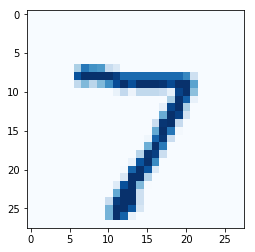

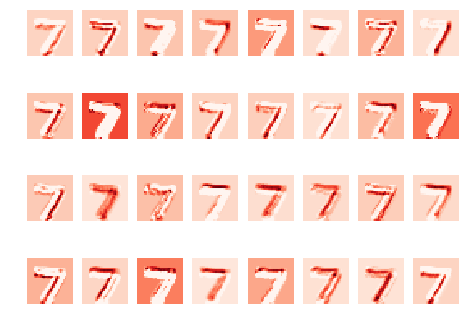

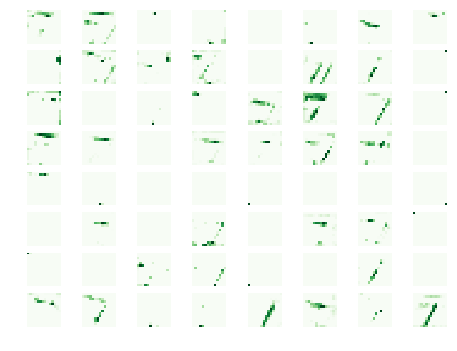

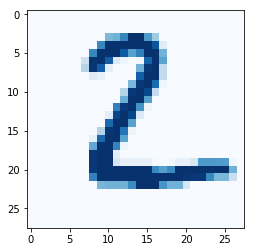

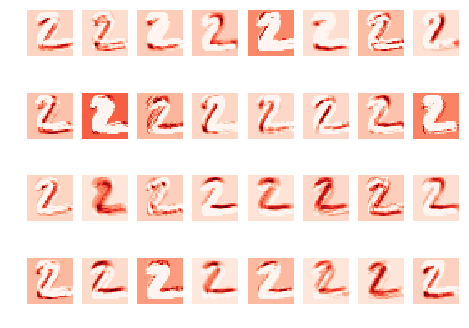

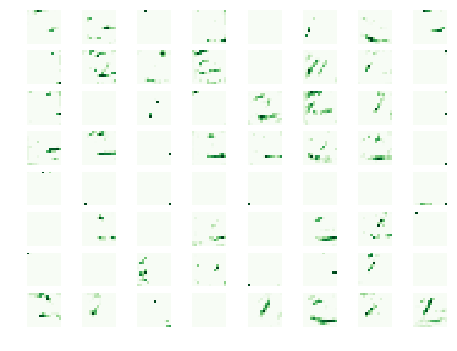

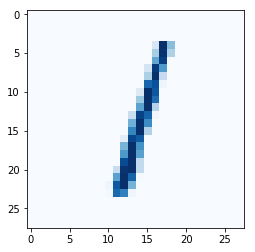

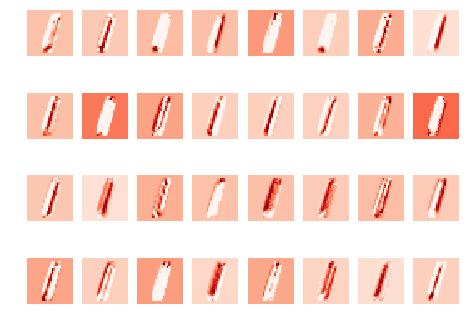

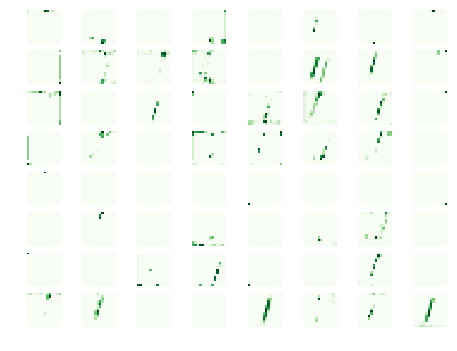

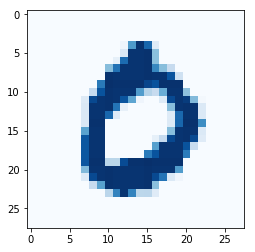

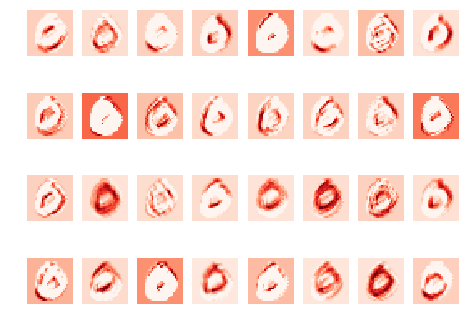

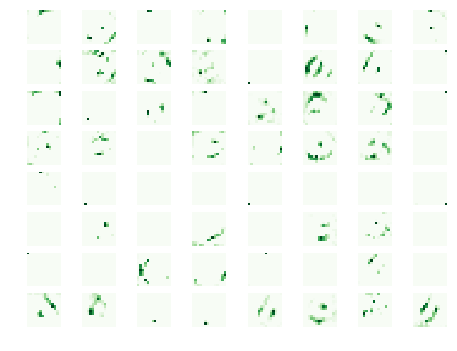

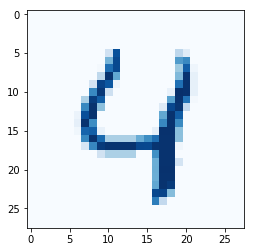

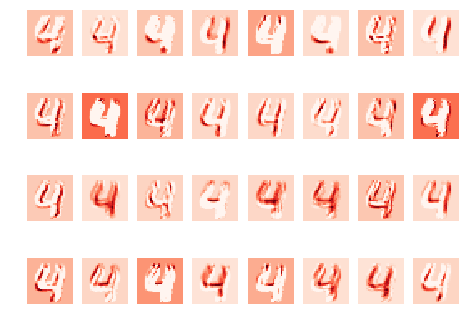

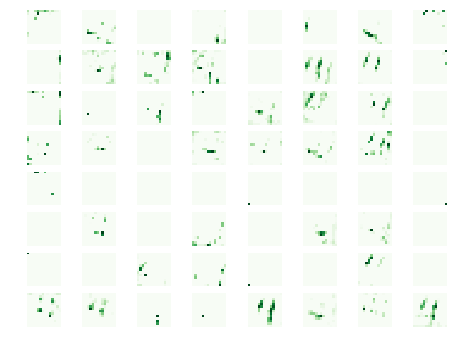

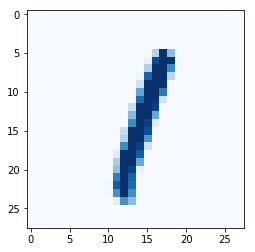

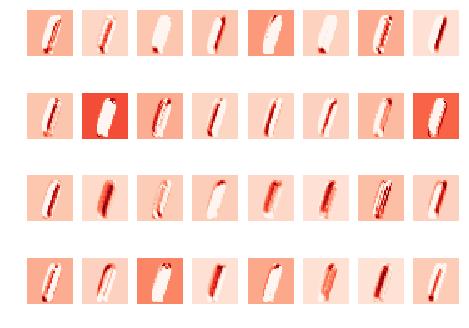

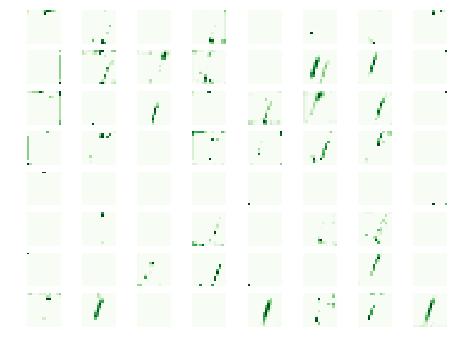

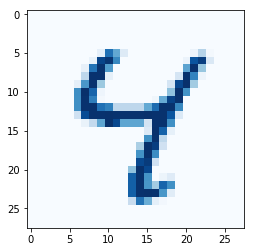

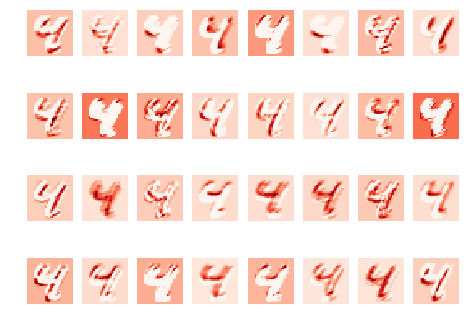

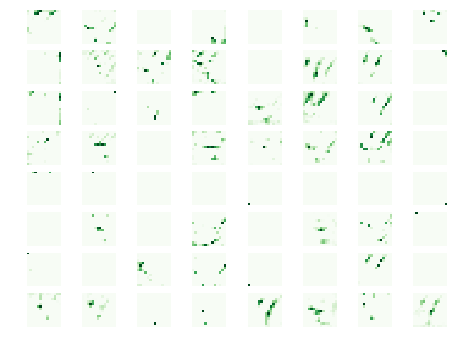

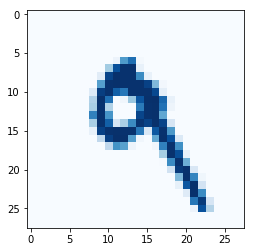

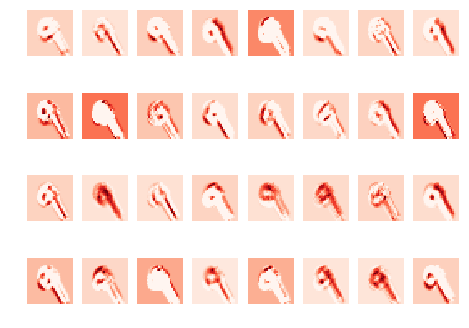

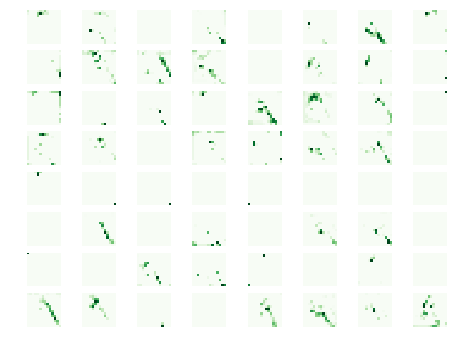

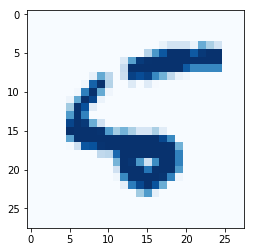

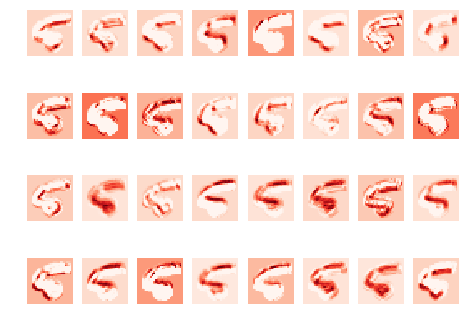

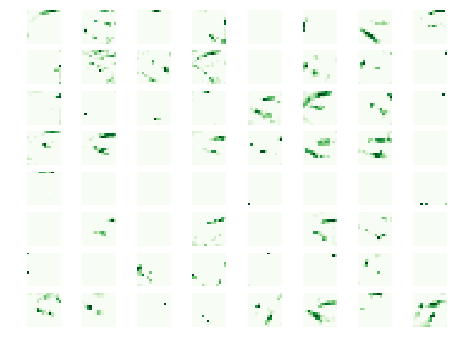

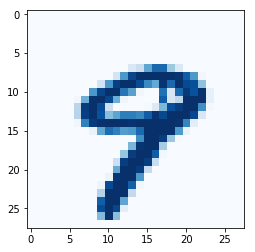

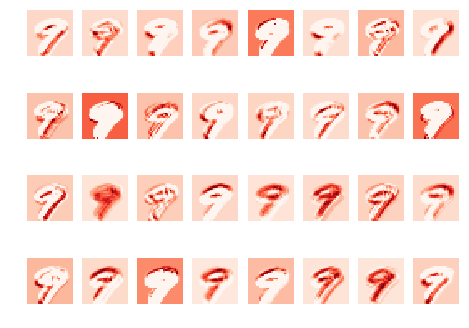

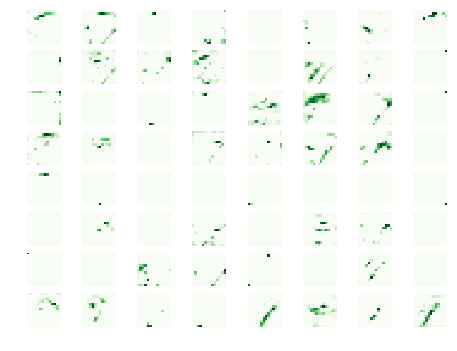

In [74]:
for i in range(10):
    plt.imshow(images[i].reshape(28,28), cmap='Blues')
    plt.show()
    cnn1_images = cnn1[i].reshape(28, 28, 32)
    print_cnn_images(cnn1_images, 8, 4, 'Reds')
    plt.show()
    # cnn1_p_images = cnn1_p[i].reshape(14, 14, 32)
    # print_cnn_images(cnn1_p_images, 8, 4, 'Reds')
    # plt.show()
    cnn2_images = cnn2[i].reshape(14, 14, 64)
    print_cnn_images(cnn2_images, 8, 8, 'Greens')
    plt.show()
    # cnn2_p_images = cnn2_p[i].reshape(7, 7, 64)
    # print_cnn_images(cnn2_p_images, 8, 8, 'Greens')
    # plt.show()